# Exploring and Analyzing Paris trees data

Taken from https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+2+Participez+%C3%A0+un+concours+sur+la+Smart+City/p2-arbres-fr.csv, coming from https://opendata.paris.fr/explore/dataset/les-arbres/map/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6Imxlcy1hcmJyZXMiLCJvcHRpb25zIjp7fX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJBVkciLCJ5QXhpcyI6ImlkYmFzZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiMwMDMzNjYifV0sInhBeGlzIjoidHlwZWVtcGxhY2VtZW50IiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&disjunctive.typeemplacement&disjunctive.arrondissement&disjunctive.libellefrancais&disjunctive.genre&disjunctive.espece&disjunctive.varieteoucultivar&disjunctive.stadedeveloppement&disjunctive.remarquable&location=12,48.85984,2.31341&basemap=jawg.streets

## 1) Opening csv file

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.listdir()
os.chdir("/content/drive/MyDrive/Colab_Notebooks/Project_2")
print(f'Working directory: {os.getcwd()}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Working directory: /content/drive/MyDrive/Colab_Notebooks/Project_2


In [2]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format) # don't want scientific notation. Floats are enough

csv_path = "./p2-trees-fr.csv"
df = pd.read_csv(csv_path, sep=';')

## 2) Naive Analysis

### Use pandas basic methods

In [3]:
import sys
print('Size in MB:')
sys.getsizeof(df)/(10**6)

Size in MB:


145.955268

In [4]:
df.info() # display count of columns, lines and columns names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

In [5]:
df.head(2) # display 2 first lines

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.00,48.86,2.32
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.86,2.32


In [6]:
df.describe()# general statistics only on number types variables (int and floats)

# problems:
## 0 as min value for circumference, height
## > 250000 cm as circumference, > 800000 m as height

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,200137.00,0.00,200137.00,200137.00,137039.00,200137.00,200137.00
mean,387202.68,NaN,83.38,13.11,0.00,48.85,2.35
std,545603.24,NaN,673.19,1971.22,0.04,0.03,0.05
min,99874.00,NaN,0.00,0.00,0.00,48.74,2.21
25%,155927.00,NaN,30.00,5.00,0.00,48.84,2.31
50%,221078.00,NaN,70.00,8.00,0.00,48.85,2.35
75%,274102.00,NaN,115.00,12.00,0.00,48.88,2.39
max,2024745.00,NaN,250255.00,881818.00,1.00,48.91,2.47


In [86]:
from data_analysis_functions import plot_univariate_variable_analysis, plot_bivariate_variable_analysis, compute_bivariate_stats_indicators

In [9]:
type(df[df['espece'].notna()]['espece'].values[0]) == str

True

In [10]:
quantitative_variables = ['circonference_cm','hauteur_m']

### Looking for data anomalies

#### Outliers

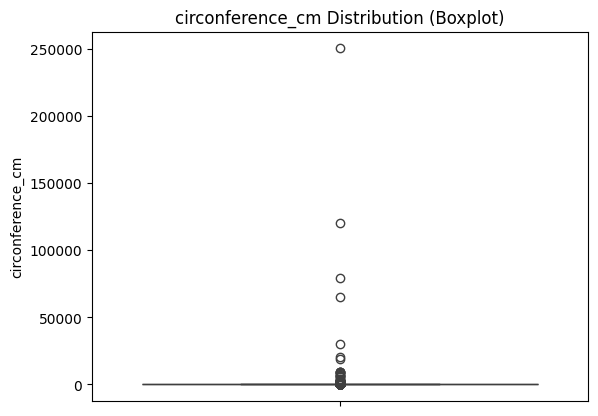

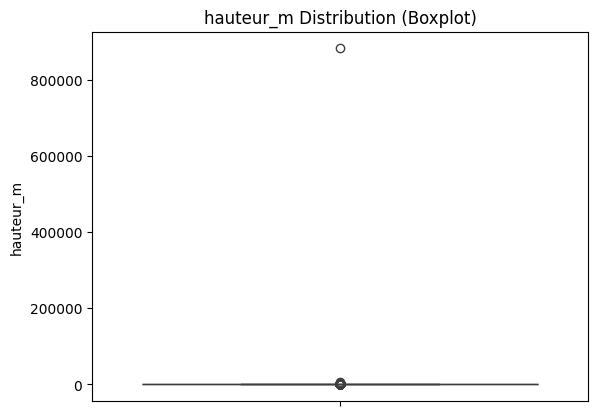

In [11]:
# Boxplots in order to briefly find outliers
for variable in quantitative_variables:
    plot_univariate_variable_analysis(df, variable, 'boxplot')

It seems that there are many outliers on data

#### NaN

In [12]:
import missingno as msno
import numpy as np

In [13]:
# number of 'nan' for each column
column_nb_of_nans = np.array([], dtype='int')
for column in df.columns:
    where_nan = df[df[column].isna()]
    column_nb_of_nans = np.concatenate((column_nb_of_nans,[len(where_nan)]))
column_nb_of_nans

array([     0,      0,      1,      0, 169235, 200137,      0,      0,
         1497,     16,   1752, 163360,      0,      0,  67205,  63098,
            0,      0])

In [14]:
# dataframe with number of nans per column only when one nan or more
where_nans = np.where(column_nb_of_nans>0)
columns_with_nans_df = pd.DataFrame([column_nb_of_nans[where_nans]], columns = df.columns[where_nans])
print('Number of nan for each variable that contains minimum 1 occurrence:')
columns_with_nans_df

Number of nan for each variable that contains minimum 1 occurrence:


,domanialite,complement_addresse,numero,libelle_francais,genre,espece,variete,stade_developpement,remarquable
0,1,169235,200137,1497,16,1752,163360,67205,63098


<Axes: >

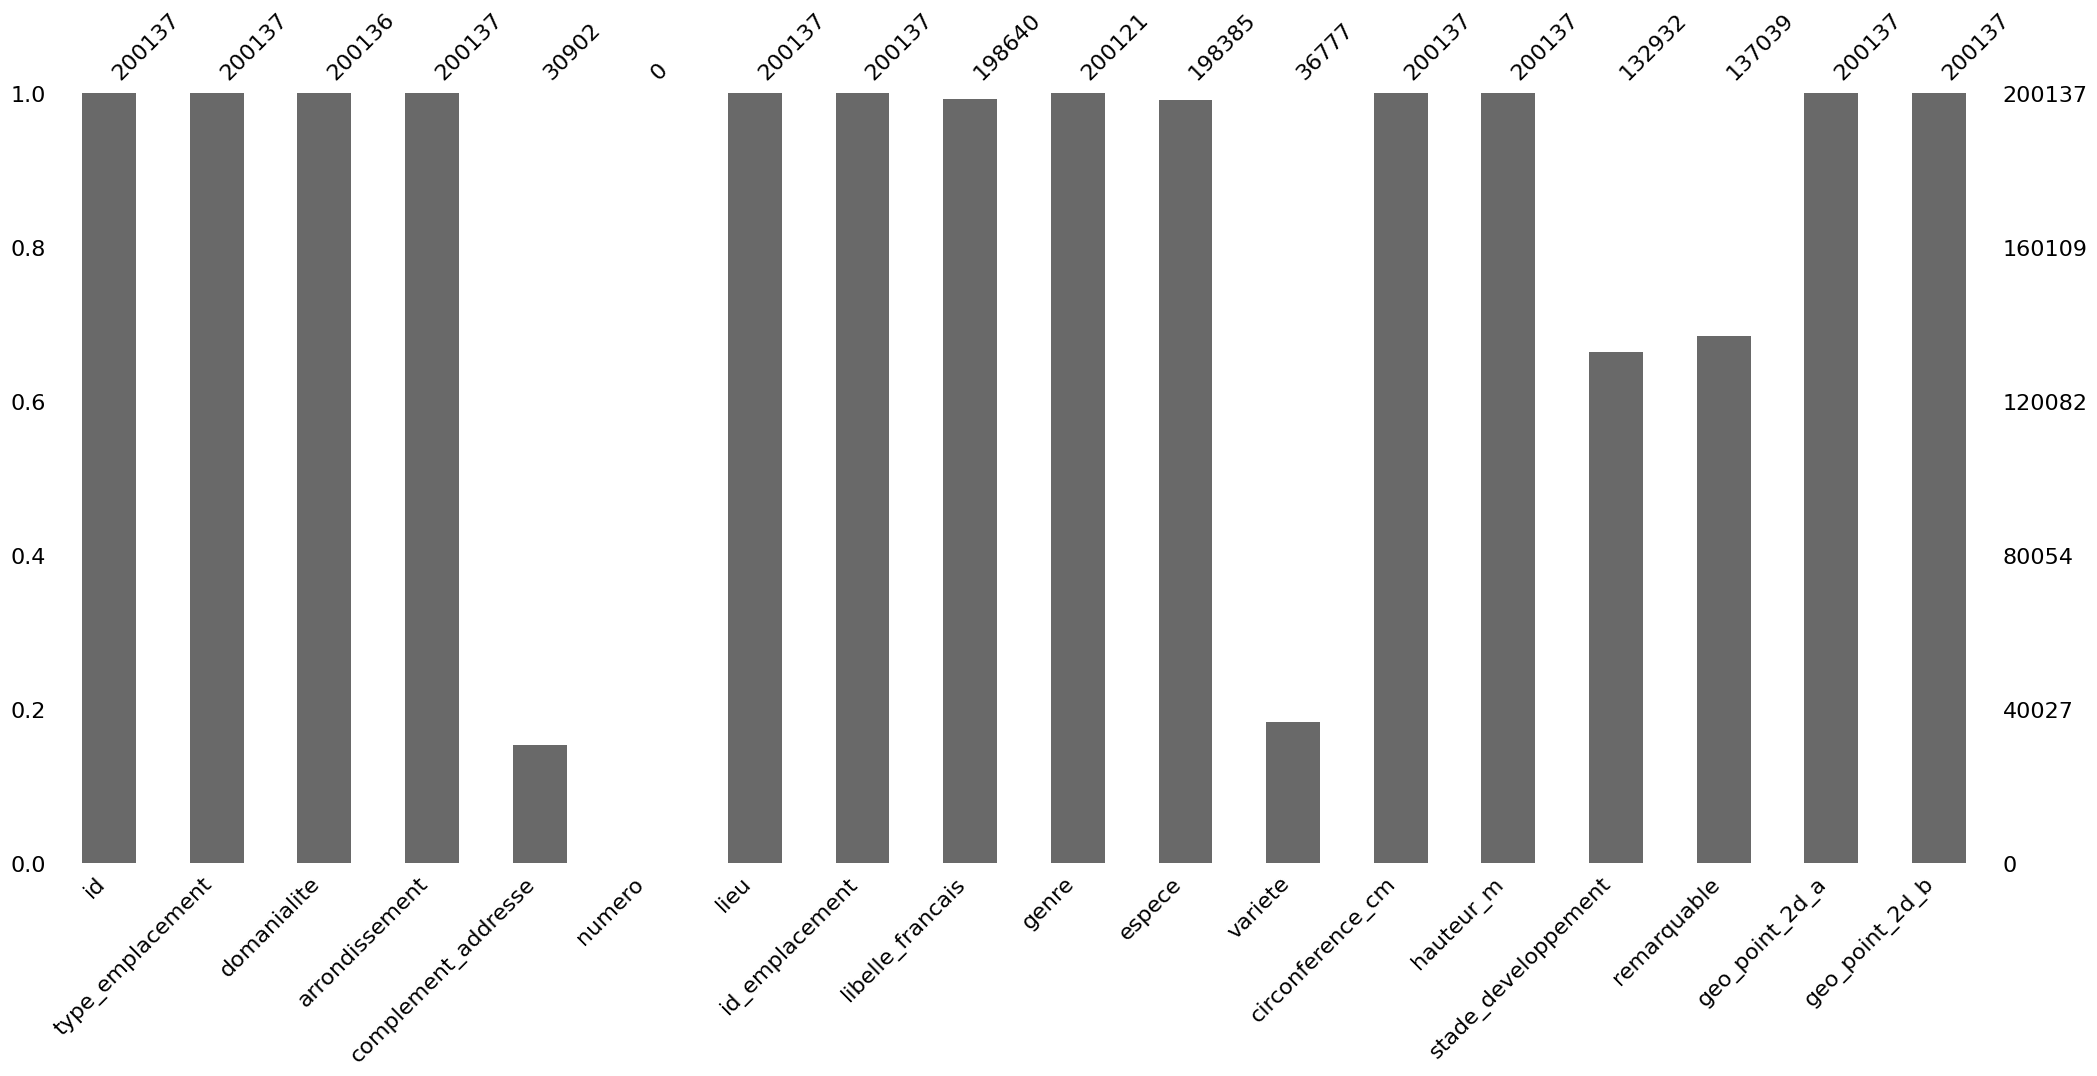

In [15]:
# stade_developpement and remarquable are missing around 30% values. Variete is missing 80 percent values
msno.bar(df)

<Axes: >

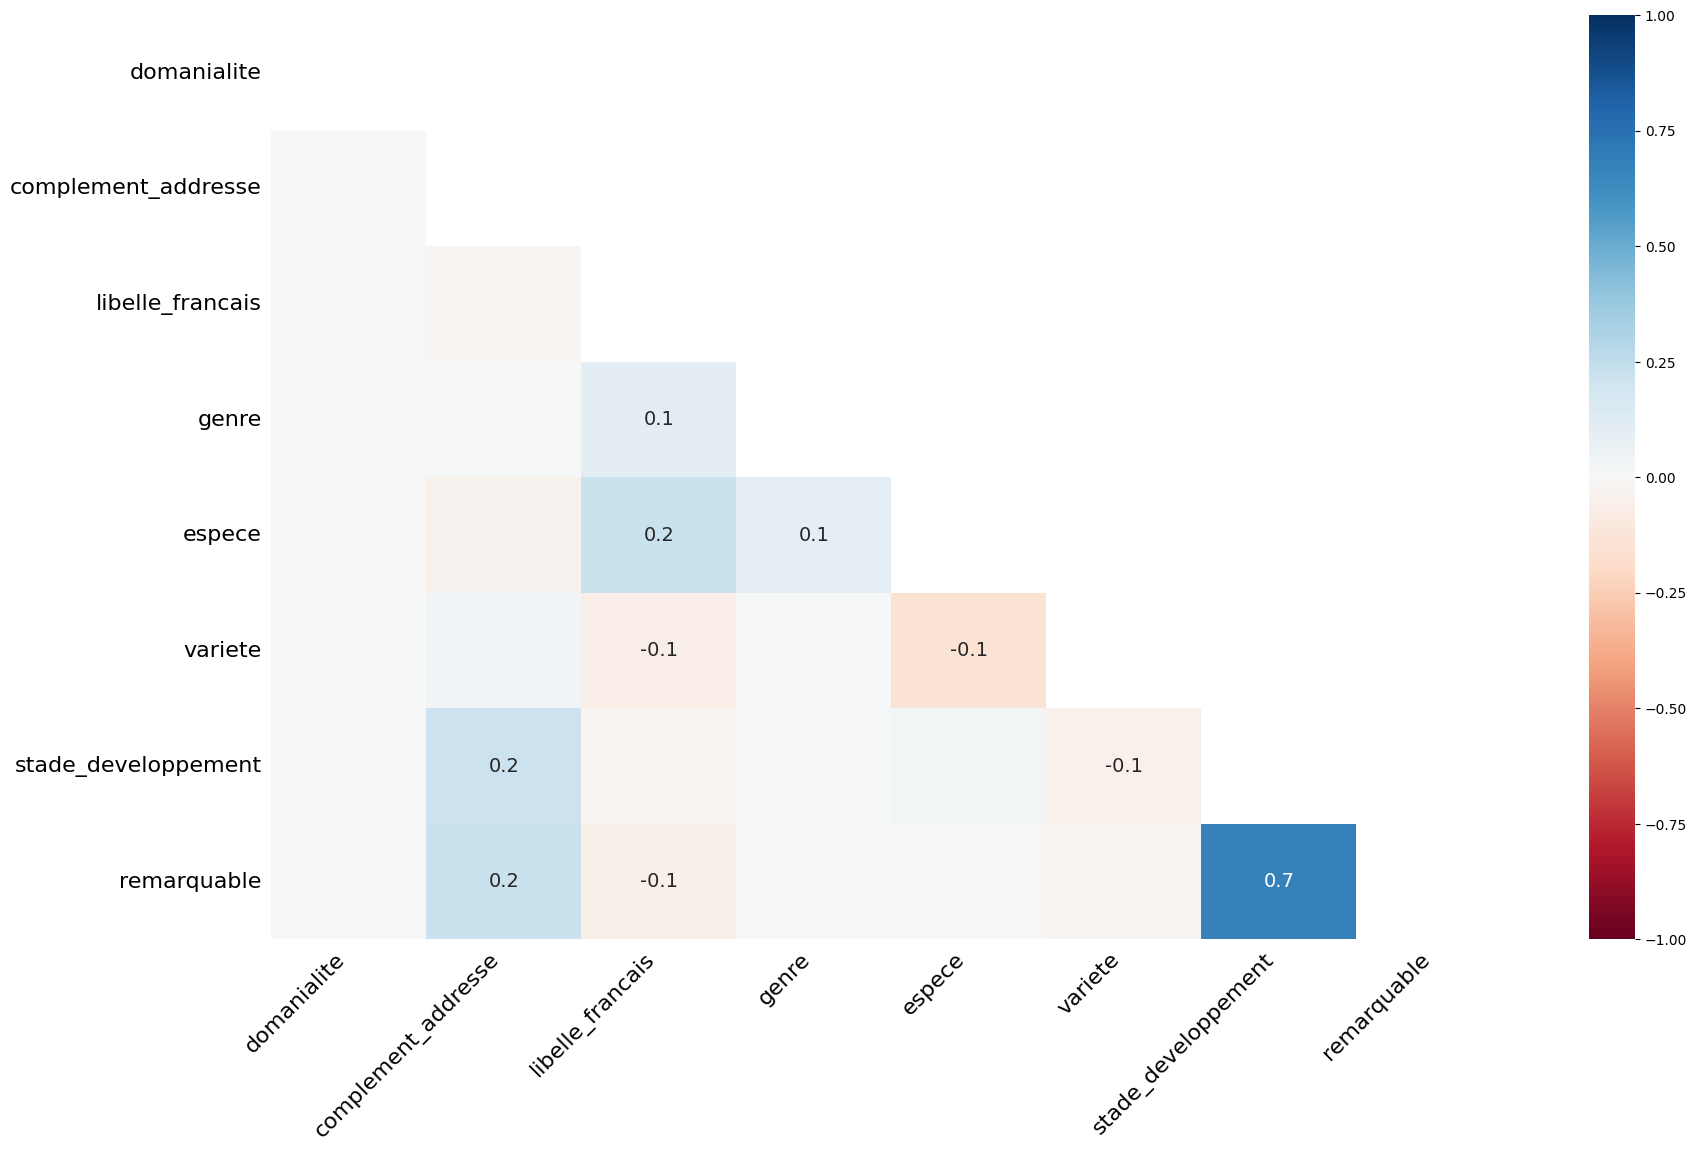

In [16]:
# missing values correlation between stade_developpement and remarquable. Look at which trees they are
msno.heatmap(df)

## 3) Cleaning anomalies

In [17]:
df_refined = df.copy()

### Outliers (min and max)

##### Max

Height :

In [18]:
# based on the tallest tree height : https://en.wikipedia.org/wiki/Hyperion_(tree)
# max_height = 116 # in meters
# tallest tree in Paris is supposed to be this one (40 m), so the others heights are wrong : https://france3-regions.francetvinfo.fr/paris-ile-de-france/paris/mais-quel-est-le-plus-grand-arbre-de-paris-2982575.html
max_height = 45 # in meters

In [19]:
max_height_outlier_df = df_refined[(df_refined['hauteur_m'] >= max_height)]

In [20]:
print('height outliers trees ('+ str(len(max_height_outlier_df)) + ' occurrencies):')
max_height_outlier_df


height outliers trees (479 occurrencies):


,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
4534,105885,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,SQUARE DE CHOISY,277,Fevier,Gleditsia,triacanthos,NaN,45,45,NaN,NaN,48.83,2.36
4537,105888,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,SQUARE DE CHOISY,280,Tulipier,Liriodendron,tulipifera,NaN,45,45,NaN,NaN,48.83,2.36
5392,106800,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,JARDIN DU CHAMP DE MARS,A0120683,Tilleul,Tilia,n. sp.,NaN,100,1510,A,0.00,48.86,2.30
5469,106880,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,JARDIN DU CHAMP DE MARS,P0070763,If,Taxus,baccata,NaN,61,65,A,0.00,48.85,2.30
5599,107029,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,JARDIN DU CHAMP DE MARS,A0041225,Platane,Platanus,x hispanica,NaN,41,68,JA,0.00,48.86,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194812,2018093,Arbre,Alignement,PARIS 18E ARRDT,95,NaN,RUE DE LA CHAPELLE,1501013,Platane,Platanus,x hispanica,NaN,35,65,J,0.00,48.90,2.36
197026,2020675,Arbre,Jardin,PARIS 18E ARRDT,NaN,NaN,JARDINIERES T3 BOULEVARD NEY CHAPELLE / 2 AVEN...,101016,Pin,Pinus,nigra,NaN,50,65,J,0.00,48.90,2.36
197060,2020711,Arbre,Alignement,PARIS 19E ARRDT,NaN,NaN,QUAI DE LA CHARENTE,201004,Aulne,Alnus,cordata,NaN,30,55,JA,0.00,48.90,2.38
197136,2020792,Arbre,Jardin,PARIS 14E ARRDT,NaN,NaN,SQUARE AUGUSTE RENOIR / 205 RUE RAYMOND LOSSERAND,103005,Erable,Acer,platanoides,NaN,145,125,A,0.00,48.83,2.31


In [21]:
max_height_outlier_df.value_counts('hauteur_m').sort_index(ascending=True)

,count
hauteur_m,
45,19
46,1
47,1
50,13
52,1
...,...
1815,1
2015,1
2525,1


In [22]:
# remove outlier value
df_refined.loc[df_refined['hauteur_m'] == 881818, 'hauteur_m'] = np.nan

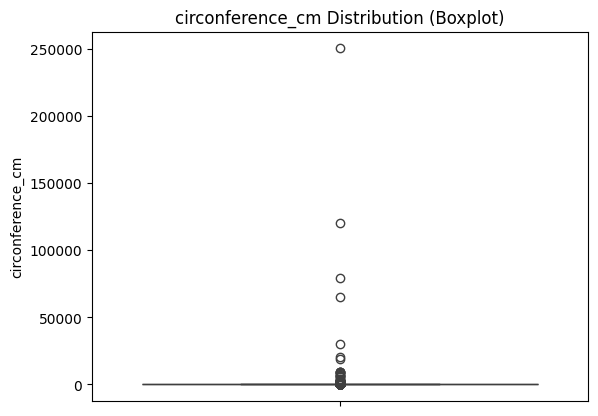

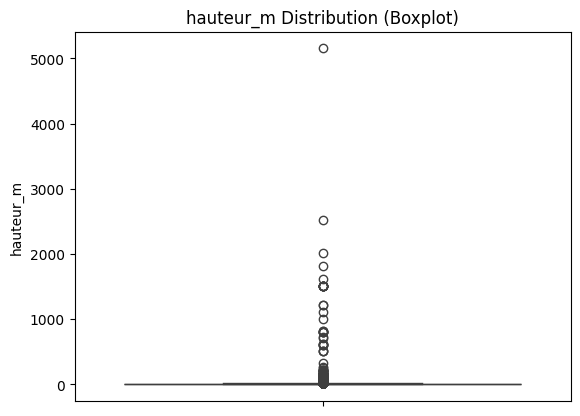

In [23]:
for variable in quantitative_variables:
    plot_univariate_variable_analysis(df_refined, variable, 'boxplot')

In [24]:
# need in order to divide by 100 the too high heights
df_refined['hauteur_m'] = df_refined['hauteur_m'].astype(float)

In [25]:
# Too high remaining heights may have been measured in cms
df_refined.loc[df_refined['hauteur_m'] >= max_height, 'hauteur_m'] = df_refined.loc[df_refined['hauteur_m'] >= max_height, 'hauteur_m']/100

In [26]:
print(f"Amount of to high heights : {len(max_height_outlier_df)}.\n1 value has been removed (set to 'NaN').\n{len(max_height_outlier_df)-1} values may have been measured in cms --> converted in meters.")

Amount of to high heights : 479.
1 value has been removed (set to 'NaN').
478 values may have been measured in cms --> converted in meters.


Girth :

In [27]:
# based on the biggest tree girth (circumference) : https://www.guinnessworldrecords.com/world-records/living-tree-with-greatest-girth
max_girth = 36 # in meters

In [28]:
max_girth_outlier_df = df_refined[(df_refined['circonference_cm']/100 > max_girth)]

In [29]:
print('girth outliers trees ('+ str(len(max_girth_outlier_df)) + ' occurrencies):')
max_girth_outlier_df

girth outliers trees (20 occurrencies):


,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
71787,190080,Arbre,DASCO,PARIS 20E ARRDT,NaN,NaN,PLAINE (9) ELEM B,11110006,Tilleul,Tilia,tomentosa,NaN,18589,15.00,A,0.00,48.85,2.40
82951,203295,Arbre,Alignement,PARIS 18E ARRDT,NaN,NaN,RUE D AUBERVILLIERS,301004,Erable,Acer,monspessulanum,NaN,5545,0.56,J,0.00,48.89,2.37
90605,211362,Arbre,Alignement,PARIS 5E ARRDT,34,NaN,BOULEVARD SAINT MARCEL,204025,Cedrele,Toona,sinensis,NaN,20130,16.00,A,0.00,48.84,2.36
91256,212024,Arbre,Alignement,PARIS 12E ARRDT,NaN,NaN,RUE DE CHALON,202005,Micocoulier,Celtis,australis,NaN,30140,10.00,A,0.00,48.85,2.37
97354,218274,Arbre,Alignement,PARIS 7E ARRDT,27,NaN,AVENUE RAPP,501003,Platane,Platanus,occidentalis,NaN,8110,18.00,A,0.00,48.86,2.30
103437,224609,Arbre,Alignement,PARIS 18E ARRDT,NaN,NaN,BOULEVARD BARBES,1303003,Platane,Platanus,x hispanica,NaN,9035,6.00,J,0.00,48.89,2.35
133546,256868,Arbre,Alignement,PARIS 19E ARRDT,NaN,NaN,AVENUE JEAN JAURES,1501006,Platane,Platanus,x hispanica,NaN,4090,10.00,A,0.00,48.89,2.39
147235,270997,Arbre,Alignement,PARIS 7E ARRDT,NaN,NaN,QUAI BRANLY,503005,Paulownia,Paulownia,tomentosa,NaN,9155,15.00,A,0.00,48.86,2.29
147634,271402,Arbre,Alignement,PARIS 7E ARRDT,NaN,NaN,AVENUE BOSQUET,1202016,Platane,Platanus,occidentalis,NaN,65110,16.00,A,0.00,48.86,2.31
148106,271884,Arbre,Alignement,PARIS 7E ARRDT,NaN,NaN,AVENUE BOSQUET,501022,Platane,Platanus,occidentalis,NaN,6595,15.00,A,0.00,48.86,2.30


In [30]:
max_girth_outlier_df.value_counts('circonference_cm')

,count
circonference_cm,
3630,1
4090,1
120170,1
79120,1
65110,1
30140,1
20130,1
18589,1
9155,1


In [31]:
max_girth_outlier_df.value_counts('hauteur_m')

,count
hauteur_m,
10.00,4
15.00,3
5.00,2
16.00,2
18.00,2
20.00,2
0.56,1
6.00,1
8.15,1


In [32]:
# Set circonference_cm values to NaN for these indexes
df_refined.loc[max_girth_outlier_df.index, 'circonference_cm'] = np.nan

In [33]:
print(f'Amount of to high girths : {len(max_girth_outlier_df)}.\nAll values have been set to "NaN" and the cases will be reported')

Amount of to high girths : 20.
All values have been set to "NaN" and the cases will be reported


##### Min

Height :

In [34]:
# based on the tallest tree height : https://en.wikipedia.org/wiki/Hyperion_(tree)
min_height = 0 # in meters

In [35]:
min_height_outlier_df = df_refined[(df_refined['hauteur_m'] <= min_height)]

In [36]:
# no negative value : ok
min_height_outlier_df.value_counts('hauteur_m')

,count
hauteur_m,
0.00,39219


In [37]:
# Maybe freshly planted trees are 0 meters tall and/or 0 is a default value when not measured
print('height outliers trees ('+ str(len(min_height_outlier_df)) + ' occurrencies):')
min_height_outlier_df

height outliers trees (39219 occurrencies):


,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38.00,0.00,NaN,NaN,48.89,2.32
5,99879,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0036,Arbre à miel,Tetradium,daniellii,NaN,38.00,0.00,NaN,NaN,48.89,2.32
6,99880,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0035,Arbre à miel,Tetradium,daniellii,NaN,37.00,0.00,NaN,NaN,48.89,2.32
11,99885,Arbre,Jardin,PARIS 16E ARRDT,NaN,NaN,JARDIN DU RANELAGH,20001,Hêtre,Fagus,sylvatica,Atropunicea',30.00,0.00,NaN,NaN,48.86,2.27
12,99887,Arbre,Jardin,PARIS 16E ARRDT,NaN,NaN,JARDIN DU RANELAGH,20003,Micocoulier,Celtis,occidentalis,NaN,205.00,0.00,NaN,NaN,48.86,2.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170151,NaN,Castanea,fargesii,NaN,0.00,0.00,NaN,0.00,48.82,2.46
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170152,Arbre aux mouchoirs,Davidia,involucrata,NaN,0.00,0.00,NaN,0.00,48.82,2.46
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170153,Peuplier,Populus,simonii,NaN,0.00,0.00,NaN,0.00,48.82,2.46
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170154,Chêne,Quercus,n. sp.,NaN,0.00,0.00,NaN,0.00,48.82,2.46


In [38]:
# A = Adult, JA = Jeune Adulte, J = Jeune, M = Mature
# Majority has no stade_developpement value. Probably freshly planted grain. Recommend to not ignore these trees.
# For the others, it may probably be a fill value. I recommend setting the height values as NaN
min_height_value_counts = min_height_outlier_df.value_counts('stade_developpement', dropna=False).reset_index(name='counts')
min_height_value_counts

,stade_developpement,counts
0,NaN,36952
1,A,1191
2,JA,577
3,J,474
4,M,25


In [39]:
# giving NaN value instead of 0 for already existing trees in order to signal missing data
zero_height_but_existing_development_state = (df_refined['hauteur_m'] <= min_height) & (df_refined['stade_developpement'].isin(['A', 'JA', 'J', 'M']))
# display(df_refined[zero_girth_but_existing_development_state].head(1).transpose())
df_refined.loc[zero_height_but_existing_development_state,'hauteur_m'] = np.nan

# giving NaN value instead of 0 for already existing trees in order to signal missing data
# df_refined.loc[(df_refined['hauteur_m'] <= min_height) & (df_refined['stade_developpement'].isin(['A', 'JA', 'J', 'M'])),
#                                                           'hauteur_m'] = np.nan
# check 1 or 2 trees tagged as 'A' or 'JA' (or other) to see if these really is a positive height

In [40]:
print(f"{min_height_value_counts['counts'].sum()-min_height_value_counts['counts'][0]} trees have a zero height value whereas they belong to one of these categories : ['A', 'JA', 'J', 'M'] --> height value set to 'NaN'")
print(f"{min_height_value_counts['counts'][0]} trees have a zero height with no 'stade_developpement' value. They probably are freshly planted grains : height value is kept zero")


2267 trees have a zero height value whereas they belong to one of these categories : ['A', 'JA', 'J', 'M'] --> height value set to 'NaN'
36952 trees have a zero height with no 'stade_developpement' value. They probably are freshly planted grains : height value is kept zero


Girth :

In [41]:
# based on the biggest tree girth (circumference) : https://www.guinnessworldrecords.com/world-records/living-tree-with-greatest-girth
min_girth = 0 # in meters

In [42]:
min_girth_outlier_df = df_refined[df_refined['circonference_cm'] <= min_girth]

In [43]:
# no negative value : ok
min_girth_outlier_df.value_counts('circonference_cm')

,count
circonference_cm,
0.00,25867


In [44]:
# Maybe freshly planted trees have 0 cms girth and/or 0 is a default value when not measured
print('girth outliers trees ('+ str(len(min_girth_outlier_df)) + ' occurrencies):')
min_girth_outlier_df

girth outliers trees (25867 occurrencies):


,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
1778,101922,Arbre,Jardin,PARIS 19E ARRDT,NaN,NaN,PARC DES BUTTES CHAUMONT,C0400032,Erable,Acer,platanoides,NaN,0.00,0.00,NaN,NaN,48.88,2.38
2332,102591,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000B0052,Magnolia,Magnolia,x soulangeana,Heaven Scent',0.00,0.00,NaN,NaN,48.89,2.32
2333,102592,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000B0053,Magnolia,Magnolia,x soulangeana,Heaven Scent',0.00,0.00,NaN,NaN,48.89,2.32
2405,102744,Arbre,Jardin,PARIS 20E ARRDT,NaN,NaN,SQUARE LEON FRAPIE,2,Platane,Platanus,x hispanica,NaN,0.00,NaN,JA,0.00,48.87,2.41
2430,102773,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000B0021,Magnolia,Magnolia,x soulangeana,Sundew',0.00,0.00,NaN,NaN,48.89,2.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170151,NaN,Castanea,fargesii,NaN,0.00,0.00,NaN,0.00,48.82,2.46
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170152,Arbre aux mouchoirs,Davidia,involucrata,NaN,0.00,0.00,NaN,0.00,48.82,2.46
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170153,Peuplier,Populus,simonii,NaN,0.00,0.00,NaN,0.00,48.82,2.46
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170154,Chêne,Quercus,n. sp.,NaN,0.00,0.00,NaN,0.00,48.82,2.46


In [45]:
# A = Adult, JA = Jeune Adulte, J = Jeune, M = Mature
# Majority has no stade_developpement value. Probably freshly planted grain. Recommend to not ignore these trees.
# For the others, it may probably be a fill value. I recommend setting the height values as NaN
min_girth_value_counts = min_girth_outlier_df.value_counts('stade_developpement', dropna=False).reset_index(name='counts')
min_girth_value_counts

,stade_developpement,counts
0,NaN,25586
1,J,126
2,A,81
3,JA,51
4,M,23


In [46]:
# giving NaN value instead of 0 for already existing trees in order to signal missing data
zero_girth_but_existing_development_state = (df_refined['circonference_cm'] <= min_girth) & (df_refined['stade_developpement'].isin(['A', 'JA', 'J', 'M']))
# display(df_refined[zero_girth_but_existing_development_state].head(1).transpose())
df_refined.loc[zero_girth_but_existing_development_state,'circonference_cm'] = np.nan
# same question as minimum height (see above)

In [47]:
print(f"{min_girth_value_counts['counts'].sum()-min_girth_value_counts['counts'][0]} trees have a zero girth value whereas they belong to one of these categories : ['A', 'JA', 'J', 'M'] --> girth value set to 'NaN'")
print(f"{min_girth_value_counts['counts'][0]} trees have a zero girth with no 'stade_developpement' value. They probably are freshly planted grains : girth value is kept zero")


281 trees have a zero girth value whereas they belong to one of these categories : ['A', 'JA', 'J', 'M'] --> girth value set to 'NaN'
25586 trees have a zero girth with no 'stade_developpement' value. They probably are freshly planted grains : girth value is kept zero


##### Girth and Height coherence

In [48]:
from IPython.display import display

# search if trees 0 meters height trees and 0 cms girth trees are the same
both_zero = ((df_refined['hauteur_m'] <= 0) & (df_refined['circonference_cm'] <= 0)).sum()
print(f"{both_zero} trees are both 0 m tall and 0 cms girth --> they probably are freshly planted grains")

height_zero_girth_non_zero = (df_refined['hauteur_m'] <= 0) & (df_refined['circonference_cm'] > 0)
# display(df_refined[height_zero_girth_non_zero].head(1).transpose())
df_refined.loc[height_zero_girth_non_zero,'hauteur_m'] = np.nan
print(f"{height_zero_girth_non_zero.sum()} trees are 0 m tall but have strictly positive and coherent girth --> height values are set to 'NaN' ")

non_zero_height_zero_girth = (df_refined['hauteur_m'] > 0) & (df_refined['circonference_cm'] <= 0)
# display(df_refined[non_zero_height_zero_girth].head(1).transpose())
df_refined.loc[non_zero_height_zero_girth,'circonference_cm'] = np.nan
print(f"{non_zero_height_zero_girth.sum()} trees have strictly positive and coherent height but 0 cm girth --> girth values are set to 'NaN' ")



25264 trees are both 0 m tall and 0 cms girth --> they probably are freshly planted grains
11688 trees are 0 m tall but have strictly positive and coherent girth --> height values are set to 'NaN' 
322 trees have strictly positive and coherent height but 0 cm girth --> girth values are set to 'NaN' 


### NaN Values

```
# domanialite can be found when looking for nearest neighbors
# complement_adresse and numero often do not exist
# Maybe can we do something about the missing values for "libelle_francais", "genre", "espece", "variete"
# stade_developpement and remarkable missing values presences seem to be correlated (according to previous analysis)
```




In [49]:
columns_with_nans_df

,domanialite,complement_addresse,numero,libelle_francais,genre,espece,variete,stade_developpement,remarquable
0,1,169235,200137,1497,16,1752,163360,67205,63098


#### domanialite

In [50]:
df_refined[['geo_point_2d_a','geo_point_2d_b']].values

array([[48.85761995,  2.32096211],
       [48.85765607,  2.32103142],
       [48.85770501,  2.32106057],
       ...,
       [48.82290714,  2.45797007],
       [48.82252234,  2.45595555],
       [48.82044479,  2.45485622]])

In [51]:
from data_analysis_functions import compute_distances

In [52]:
nan_indexes = df_refined[df_refined['domanialite'].isna()].index
nan_indexes
df_refined.loc[nan_indexes, ['geo_point_2d_a','geo_point_2d_b']].values

array([[48.84954716,  2.41418967]])

In [53]:
for index in nan_indexes:
    distances = compute_distances(df_refined, index)
    # find three nearest neighbours
    three_nearest_neighbours = distances.nsmallest(4)[1:]
    print(f'Mean distance between tree {index} and its 3 nearest neighbours: {three_nearest_neighbours.mean().round(2)} meters')
    missing_domanialite = df_refined.loc[three_nearest_neighbours.index,'domanialite'].unique()
    if len(missing_domanialite) == 1:
        print(f'Missing values for domanialite: {missing_domanialite[0]}')
        df_refined.loc[index, 'domanialite'] = missing_domanialite[0]
    else:
        print(f'Too many values in missing_domanialite: {missing_domanialite}')

Mean distance between tree 197239 and its 3 nearest neighbours: 6.02 meters
Missing values for domanialite: Jardin


#### genre

In [54]:
# catch each line where "genre" value is nan. Catch only 'genre','espece','variete','libelle_francais' columns

# Assuming df_refined is your DataFrame as defined in the provided code.

genre_nan_rows = df_refined[df_refined['genre'].isna()][['genre', 'espece', 'variete', 'libelle_francais']]

genre_nan_rows

,genre,espece,variete,libelle_francais
195404,NaN,NaN,NaN,NaN
195409,NaN,NaN,NaN,NaN
195410,NaN,NaN,NaN,NaN
195475,NaN,NaN,NaN,NaN
195476,NaN,NaN,NaN,NaN
195487,NaN,NaN,NaN,NaN
195496,NaN,NaN,NaN,NaN
195497,NaN,NaN,NaN,NaN
195499,NaN,NaN,NaN,NaN
195502,NaN,NaN,NaN,NaN


Cannot find "genre" value since all the other values for "espece", "variete", "libelle_francais" are "nan".

#### libelle_francais

In [55]:
print(f"Number of different libelle_francais values: {len(np.unique(df_refined['libelle_francais'].astype(str)))}")
# nan is in the list. We will continue ignoring it in order to potentially find a correspondance between libelle_francais and genre variable
print('nan' in np.unique(df_refined['libelle_francais'].astype(str)))

Number of different libelle_francais values: 193
True


In [56]:
# not the most useful
# For each value of "libelle_francais", find when there is only one genre possible.
# Count the cases when there is only one genre related to libelle_francais and the cases where it is not.
# Please consider the "nan" cases in another counter variable

# Count different 'genre' values for each 'libelle_francais'. NaNs are ignored
libelle_genre_counts = df_refined.groupby('libelle_francais')['genre'].nunique()

one_genre_count = (libelle_genre_counts == 1).sum()
multiple_genres_count = (libelle_genre_counts > 1).sum()

nan_genre_count = df_refined[(df_refined['libelle_francais'].notna()) & (df_refined['genre'].isna())].shape[0]

print(f"Number of different libelle_francais values: {len(libelle_genre_counts)}")
print('Possible correlation between libelle_francais and genre:')
print(f"Number of 'libelle_francais' with one 'genre': {one_genre_count}")
print(f"Number of 'libelle_francais' with multiple 'genre': {multiple_genres_count}")

Number of different libelle_francais values: 192
Possible correlation between libelle_francais and genre:
Number of 'libelle_francais' with one 'genre': 182
Number of 'libelle_francais' with multiple 'genre': 10


In [57]:
# For each value of "genre", find when there is only one libelle_francais possible.
# Count the cases when there is only one libelle_francais related to genre and the cases where it is not.
# Please consider the "nan" cases in another counter variable

# Count different 'libelle_francais' values for each 'genre'. NaNs are ignored
genre_libelle_counts = df_refined.groupby('genre')['libelle_francais'].nunique()

one_libelle_count = (genre_libelle_counts == 1).sum()
multiple_libelles_count = (genre_libelle_counts > 1).sum()
no_libelles_count = (genre_libelle_counts < 1).sum()

print(f"Number of different genre values: {len(genre_libelle_counts)}")
print('Possible correlation between genre and libelle_francais:')
print(f"Number of 'genre' with one libelle_francais: {one_libelle_count}")
print(f"Number of 'genre' with multiple libelle_francais: {multiple_libelles_count}")
print(f"Number of 'genre' with no libelle_francais: {no_libelles_count}")
print(f"\nGenre that did not match any libelle_francais value: {genre_libelle_counts[genre_libelle_counts < 1]}")



Number of different genre values: 175
Possible correlation between genre and libelle_francais:
Number of 'genre' with one libelle_francais: 159
Number of 'genre' with multiple libelle_francais: 13
Number of 'genre' with no libelle_francais: 3

Genre that did not match any libelle_francais value: genre
Crataegomespilus    0
Podocarpus          0
x Sorbopyrus        0
Name: libelle_francais, dtype: int64


In [58]:
# Generate a dictionary that contains matching libelle_francais for each genre, based on the df_refined dataframe

# Create a dictionary that maps each 'genre' to its corresponding 'libelle_francais'
# Only include 'genre' that have a unique 'libelle_francais'
only_one_libelle_mapping = {}
more_than_one_libelle_mapping = {}
no_libelle_mapping = {}

for genre in df_refined['genre'].dropna().unique():  # Iterating over 'genre'
    libelles = df_refined[df_refined['genre'] == genre]['libelle_francais'].dropna().unique()  # Getting 'libelle_francais'
    if len(libelles) == 1:
        only_one_libelle_mapping[genre] = libelles[0]  # Mapping genre to single libelle_francais
    elif len(libelles) > 1:
        more_than_one_libelle_mapping[genre] = libelles  # Mapping genre to multiple libelle_francais
    else:
        no_libelle_mapping[genre] = None  # Mapping genre to no libelle_francais


from pprint import pprint
print(f"One libelle mapping dictionary: ({len(only_one_libelle_mapping)} values)")
# pprint(only_one_libelle_mapping)
print()
print(f"More than one libelle mapping dictionary: ({len(more_than_one_libelle_mapping)} values)")
# pprint(more_than_one_libelle_mapping)
print()
print(f"No libelle mapping dictionary: ({len(no_libelle_mapping)} values)")
pprint(no_libelle_mapping)

One libelle mapping dictionary: (159 values)

More than one libelle mapping dictionary: (13 values)

No libelle mapping dictionary: (3 values)
{'Crataegomespilus': None, 'Podocarpus': None, 'x Sorbopyrus': None}


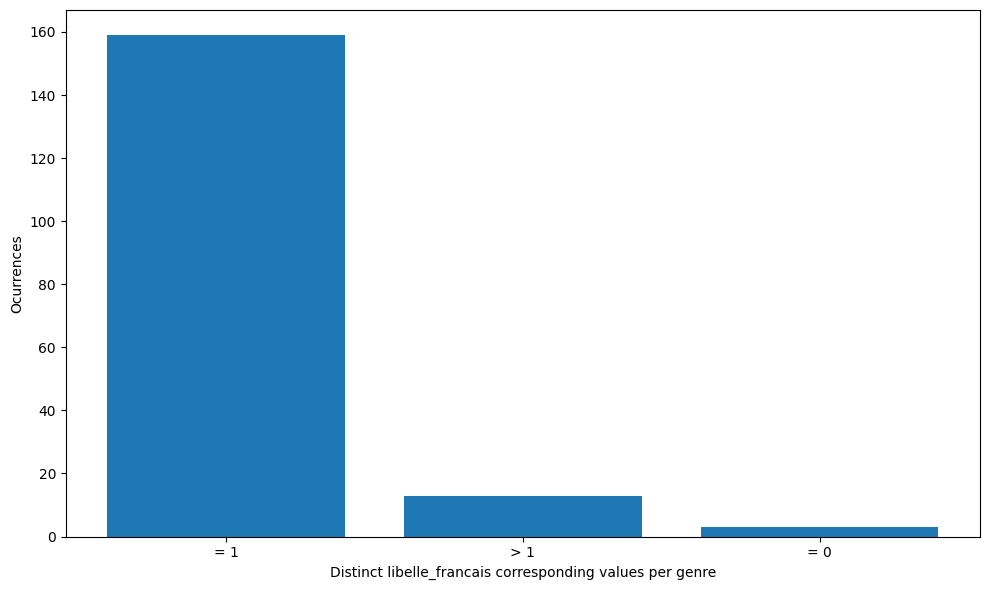

In [59]:
# prompt: plot bars with len of each dictionnary

import matplotlib.pyplot as plt

# Assuming you have the dictionaries: only_one_libelle_mapping, more_than_one_libelle_mapping, no_libelle_mapping

dictionaries = {
    "= 1": only_one_libelle_mapping,
    "> 1": more_than_one_libelle_mapping,
    "= 0": no_libelle_mapping,
}

dictionary_names = list(dictionaries.keys())
lengths = [len(dictionaries[name]) for name in dictionary_names]

plt.figure(figsize=(10, 6))
plt.bar(dictionary_names, lengths)
plt.xlabel("Distinct libelle_francais corresponding values per genre")
plt.ylabel("Ocurrences")
plt.tight_layout()
plt.show()

In [60]:
# Case "=0" corresponding libelle_francais values per genre : add the information
print(no_libelle_mapping)
print(df_refined.loc[df_refined['genre'].isin(no_libelle_mapping.keys()),['genre','espece','variete','libelle_francais']])
# https://lapepinieredufruitier.fr/categorie-produit/poirier/sorbopyrus/
# https://fr.wikipedia.org/wiki/Podocarpus_macrophyllus
# https://www.jardin-ecologique.fr/boutique/toutes-nos-plantes/plantes-mediterraneennes/plantes-pour-haies/haie-gourmande/crataegomespilus-grandifolia-neflier-a-grandes-feuilles/#:~:text=Le%20Crataegomespilus%20est%20un%20hybride,ou%20aussi%20x%20Crataegomespilus%20grandiflora
no_libelle_mapping['x Sorbopyrus'] = 'Poirier de Bollwiller'
no_libelle_mapping['Podocarpus'] = 'Pin des Bouddhistes'
no_libelle_mapping['Crataegomespilus'] = 'Neflier à grandes feuilles'

for index, row in no_libelle_mapping.items():
    if index not in only_one_libelle_mapping.keys():
        only_one_libelle_mapping[index] = row
        print(f'"{index}":"{row}" entry correctly added to the dictionary')
    else:
      print(f'Problem with "{index}" : found in both dictionaries')

{'x Sorbopyrus': None, 'Podocarpus': None, 'Crataegomespilus': None}
                   genre        espece variete libelle_francais
199193      x Sorbopyrus        n. sp.     NaN              NaN
199527        Podocarpus  macrophyllus     NaN              NaN
199528        Podocarpus  macrophyllus     NaN              NaN
200040  Crataegomespilus   grandiflora     NaN              NaN
200049  Crataegomespilus   grandiflora     NaN              NaN
"x Sorbopyrus":"Poirier de Bollwiller" entry correctly added to the dictionary
"Podocarpus":"Pin des Bouddhistes" entry correctly added to the dictionary
"Crataegomespilus":"Neflier à grandes feuilles" entry correctly added to the dictionary


In [61]:
only_one_libelle_mapping['x Sorbopyrus']

'Poirier de Bollwiller'

In [62]:
# for each line in df_refined where libelle_francais is missing (nan value),
# if genre value is not nan and genre value is in only_one_libelle_mapping dictionary, use the corresponding value in only_one_libelle_mapping as libelle_francais value

for index, row in df_refined.iterrows():
    if pd.isna(row['libelle_francais']):
        if not pd.isna(row['genre']) and row['genre'] in only_one_libelle_mapping:
            df_refined.loc[index, 'libelle_francais'] = only_one_libelle_mapping[row['genre']]

In [63]:
# number of 'nan' for each column
column_nb_of_nans = np.array([], dtype='int')
for column in df_refined.columns:
    where_nan = df_refined[df_refined[column].isna()]
    column_nb_of_nans = np.concatenate((column_nb_of_nans,[len(where_nan)]))
column_nb_of_nans

array([     0,      0,      0,      0, 169235, 200137,      0,      0,
          304,     16,   1752, 163360,    623,  13956,  67205,  63098,
            0,      0])

In [64]:
# dataframe with number of nans per column only when one nan or more
where_nans = np.where(column_nb_of_nans>0)
columns_with_nans_df = pd.DataFrame([column_nb_of_nans[where_nans]], columns = df_refined.columns[where_nans])
print('Number of nan for each variable that is concerned by 1 nan or more:')
columns_with_nans_df

Number of nan for each variable that is concerned by 1 nan or more:


,complement_addresse,numero,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable
0,169235,200137,304,16,1752,163360,623,13956,67205,63098


In [65]:
# Case ">1 " corresponding libelle_francais values per genre : check espece and (eventually) variete
more_than_one_libelle_mapping

{'Prunus': array(['Prunus n. sp.', 'Cerisier à fleurs', 'Prunier à fleurs',
        'Prunier à fruits', 'Pêcher', 'Merisier', 'Laurier-Cerise',
        'Laurier du Portugal', 'Cerisier à grappes', 'Cerisier à fruits',
        'Amandier', 'Prunellier', 'Laurier du caucase',
        'Prunus Fleur n. sp.', 'Abricotier', 'Prunus Fruit n. sp.',
        'Laurier des Açores'], dtype=object),
 'Ligustrum': array(['Troene', 'Troëne'], dtype=object),
 'Ostrya': array(['Charme-Houblon', 'Ostryer'], dtype=object),
 'Malus': array(['Pommier à fleurs', 'Pommier', 'Pommier à fruits'], dtype=object),
 'Pyrus': array(['Poirier', 'Poirier à fleurs', 'Poirier à fruits'], dtype=object),
 'Fraxinus': array(['Frêne', 'Frêne à fleurs'], dtype=object),
 'Crataegus': array(['Aubépine', 'Aubepine'], dtype=object),
 'Corylus': array(['Noisetier de Byzance', 'Noisetier'], dtype=object),
 'Sorbus': array(['Alisier', 'Sorbier', 'Cormier'], dtype=object),
 'Parrotia': array(['Parrotie de Perse - Arbre de fer', 'Parr

In [66]:
# For each couple (genre, libelle_francais) with genre the key of more_than_one_libelle_mapping and libelle_francais taking
# its value in the different corresponding lists, find if there are only one or more corresponding couple "espece" value in df_refined that fits the couple.
# If there is exactly one possible "espece" value, fill a dataframe with libelle_francais, genre and espece values.
# A 4th column for "variete" contains a NaN value. If there is more than one possible "espece" value, then check the different values for "variete" and fill the dataframe
# with the different cases

# Create an empty DataFrame to store the results
matching_libelle_francais = pd.DataFrame(columns=['libelle_francais', 'genre', 'espece', 'variete'])

# Iterate through the 'more_than_one_libelle_mapping' dictionary
for genre, libelles_francais in more_than_one_libelle_mapping.items():
    for libelle_francais in libelles_francais:
        # Find corresponding rows in df_refined
        matching_rows = df_refined[(df_refined['genre'] == genre) & (df_refined['libelle_francais'] == libelle_francais)]

        # Check the number of unique 'espece' values
        unique_especes = matching_rows['espece'].unique()
        num_unique_especes = len(unique_especes)

        if num_unique_especes == 1:
            # Exactly one 'espece' value
            espece = unique_especes[0]
            new_row = pd.DataFrame({'libelle_francais': [libelle_francais],
                                    'genre': [genre],
                                    'espece': [espece],
                                    'variete': [np.nan]})
            matching_libelle_francais = pd.concat([matching_libelle_francais, new_row], ignore_index=True)
        elif num_unique_especes > 1:
            # More than one 'espece' value, check 'variete'
            for espece in unique_especes:
                variete_values = matching_rows[matching_rows['espece'] == espece]['variete'].unique()
                for variete in variete_values:
                    new_row = pd.DataFrame({'libelle_francais': [libelle_francais],
                                            'genre': [genre],
                                            'espece': [espece],
                                            'variete': [variete]})
                    matching_libelle_francais = pd.concat([matching_libelle_francais, new_row], ignore_index=True)

# Display the resulting DataFrame
matching_libelle_francais

,libelle_francais,genre,espece,variete
0,Prunus n. sp.,Prunus,n. sp.,NaN
1,Cerisier à fleurs,Prunus,serrulata,NaN
2,Cerisier à fleurs,Prunus,serrulata,Kanzan'
3,Cerisier à fleurs,Prunus,serrulata,Hizakura'
4,Cerisier à fleurs,Prunus,serrulata,Fugenzo'
...,...,...,...,...
285,Fevier,Gymnocladus,n. sp.,NaN
286,Laurier sauce,Laurus,nobilis,NaN
287,Laurier,Laurus,n. sp.,NaN
288,Arbre à perruque,Cotinus,coggygria,NaN


In [67]:
row = df_refined[df_refined['libelle_francais'].isna()].iloc[0]
print(row)
matching_libelle_francais[
        (matching_libelle_francais['genre'] == row['genre'])]

id                                      100589
type_emplacement                         Arbre
domanialite                             Jardin
arrondissement                  PARIS 7E ARRDT
complement_addresse                        NaN
numero                                     NaN
lieu                   JARDIN DU CHAMP DE MARS
id_emplacement                        P0120631
libelle_francais                           NaN
genre                                Crataegus
espece                                japonica
variete                                    NaN
circonference_cm                         43.00
hauteur_m                                 3.00
stade_developpement                          A
remarquable                               0.00
geo_point_2d_a                           48.86
geo_point_2d_b                            2.30
Name: 528, dtype: object


,libelle_francais,genre,espece,variete
225,Aubépine,Crataegus,laevigata,NaN
226,Aubépine,Crataegus,laevigata,Paul's Scarlet Hamlet'
227,Aubépine,Crataegus,laevigata,Plena'
228,Aubépine,Crataegus,x media,Rubra Plena'
229,Aubépine,Crataegus,x media,Punicea'
230,Aubépine,Crataegus,x media,Paul's Scarlet'
231,Aubépine,Crataegus,x lavalleei,Carrierei'
232,Aubépine,Crataegus,x lavalleei,NaN
233,Aubépine,Crataegus,crus-galli,Salicifolia'
234,Aubépine,Crataegus,crus-galli,NaN


In [68]:
# in df_refined, for each row where a nan value is found at 'libelle_francais' column, check the different "libelle_francais" corresponding values in matching_libelle_francais
# that fit the couple ("genre","espece"). If there is only one possible "libelle_francais" value, then attribute it to the considered row.
# If not, also check the "variete" value and find out if there only is one "libelle_francais" possible matching value. If still not, note this case as unsolvable.

index_found = []
index_not_found = []

# Iterate through rows with NaN 'libelle_francais' in df_refined
for index, row in df_refined[df_refined['libelle_francais'].isna()].iterrows():
    # Find matching rows in matching_libelle_francais based on 'genre' and 'espece'

    matching_rows = matching_libelle_francais[
        (matching_libelle_francais['genre'].astype(str) == str(row['genre'])) &
        (matching_libelle_francais['espece'].astype(str) == str(row['espece']))
    ]

    # Check the number of unique 'libelle_francais' values
    num_unique_libelles = len(matching_rows['libelle_francais'].unique())

    if num_unique_libelles == 1:
        # Only one possible 'libelle_francais'
        df_refined.loc[index, 'libelle_francais'] = matching_rows['libelle_francais'].iloc[0]
        # print(f"'libelle_francais' value found : for index {index}")
        index_found.append(index)

    elif num_unique_libelles > 1:
        # Multiple possible 'libelle_francais', check 'variete'
        matching_rows_variete = matching_rows[
            matching_rows['variete'].astype(str) == str(row['variete'])
        ]
        num_unique_libelles_variete = len(matching_rows_variete['libelle_francais'].unique())

        if num_unique_libelles_variete == 1:
            # Only one possible 'libelle_francais' after considering 'variete'
            df_refined.loc[index, 'libelle_francais'] = matching_rows_variete['libelle_francais'].iloc[0]
            # print(f"'libelle_francais' value found : for index {index}")
            index_found.append(index)
        else: # > 1
            # Still multiple possible 'libelle_francais', mark as unsolvable
            # print(f"'libelle_francais' value not found : for index {index} : too many possible values")
            index_not_found.append(index)

    else: # num_unique_libelles == 0
        # No possible 'libelle_francais', mark as unsolvable
        # print(f"'libelle_francais' value not found : for index {index} : no matching 'libelle_francais' value")
        index_not_found.append(index)

print(f"Amount of 'libelle_francais' found: {len(index_found)}")
print(f"Amount of 'libelle_francais' not found: {len(index_not_found)}")

Amount of 'libelle_francais' found: 142
Amount of 'libelle_francais' not found: 162


In [69]:
remaining_cases = df_refined.loc[index_not_found][['genre','espece','variete','libelle_francais']].copy()
remaining_cases

,genre,espece,variete,libelle_francais
528,Crataegus,japonica,NaN,NaN
5282,Sorbus,aria,Pissardii',NaN
8900,Pyrus,Fruit n. sp.,Chanticleer',NaN
12375,Corylus,cerasifera,NaN,NaN
12959,Parrotia,persica,Chanticleer',NaN
...,...,...,...,...
199405,Crataegus,speciosa,NaN,NaN
199984,Malus,purpurea,NaN,NaN
199993,Malus,sargentii,NaN,NaN
199996,Malus,sargentii,NaN,NaN


In [70]:
distinct_remaining_cases = remaining_cases.drop_duplicates().sort_values(by=['genre','espece','variete'])
print(f'Different remaining cases : {len(distinct_remaining_cases)}')
print(distinct_remaining_cases)

# could go further but we will stop here

Different remaining cases : 51
              genre          espece                 variete libelle_francais
12375       Corylus      cerasifera                     NaN              NaN
123822      Corylus    pseudoacacia               Unifolia'              NaN
528       Crataegus        japonica                     NaN              NaN
199405    Crataegus        speciosa                     NaN              NaN
194059    Crataegus             NaN                     NaN              NaN
160955     Fraxinus         betulus             Fastigiata'              NaN
161675     Fraxinus         betulus                     NaN              NaN
107494     Fraxinus      calleryana            Chanticleer'              NaN
199101     Fraxinus       chinensis                     NaN              NaN
176284     Fraxinus           minor                     NaN              NaN
199154     Fraxinus   pensylvanicum                     NaN              NaN
198339     Fraxinus    platyphyllos          

In [71]:
# some analysis and nan replacement need to be done on espece and variete
# impossible to have variete if only have genre and espece... Can take very long time

#### espece

In [72]:
# prompt: take all the rows where "espece" is equal to nan. Then select the cases when variete is not nan

# Assuming df_refined is your DataFrame
espece_nan_rows = df_refined[df_refined['espece'].isna()]
variete_not_nan_rows = espece_nan_rows[espece_nan_rows['variete'].notna()]
variete_not_nan_rows

# same approach, based on finding the value based on the other fields. If possible, find cases where other both other fields and value are given

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
1725,101858,Arbre,Jardin,PARIS 19E ARRDT,NaN,NaN,PARC DES BUTTES CHAUMONT,D0030002,Pommier à fleurs,Malus,NaN,Aldenhamensis',40.00,4.00,NaN,NaN,48.88,2.39
2323,102582,Arbre,Jardin,PARIS 16E ARRDT,82 à 90,NaN,JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH,408032,Cornouiller,Cornus,NaN,Eddie's White Wonder',25.00,3.00,JA,0.00,48.87,2.28
2733,103215,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000B0167,Cerisier à fleurs,Prunus,NaN,Accolade',32.00,NaN,NaN,NaN,48.89,2.32
2742,103224,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000B0188,Cerisier à fleurs,Prunus,NaN,Accolade',60.00,NaN,NaN,NaN,48.89,2.32
3944,104827,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,SQUARE RENE LE GALL,10255,Pommier à fleurs,Malus,NaN,Golden Hornet',40.00,4.00,NaN,NaN,48.83,2.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198666,2022738,Arbre,Alignement,PARIS 11E ARRDT,NaN,NaN,PLACE JEAN FERRAT,301001,Orme,Ulmus,NaN,Nanguen' LUTECE,30.00,5.00,NaN,0.00,48.87,2.38
198667,2022739,Arbre,Alignement,PARIS 11E ARRDT,NaN,NaN,PLACE JEAN FERRAT,301002,Orme,Ulmus,NaN,Nanguen' LUTECE,20.00,5.00,NaN,0.00,48.87,2.38
198668,2022740,Arbre,Alignement,PARIS 11E ARRDT,NaN,NaN,PLACE JEAN FERRAT,301003,Orme,Ulmus,NaN,Nanguen' LUTECE,20.00,5.00,NaN,0.00,48.87,2.38
198680,2022752,Arbre,Alignement,PARIS 11E ARRDT,NaN,NaN,PLACE JEAN FERRAT,105001,Orme,Ulmus,NaN,Nanguen' LUTECE,20.00,5.00,NaN,0.00,48.87,2.38


### Before and After cleaning anomalies

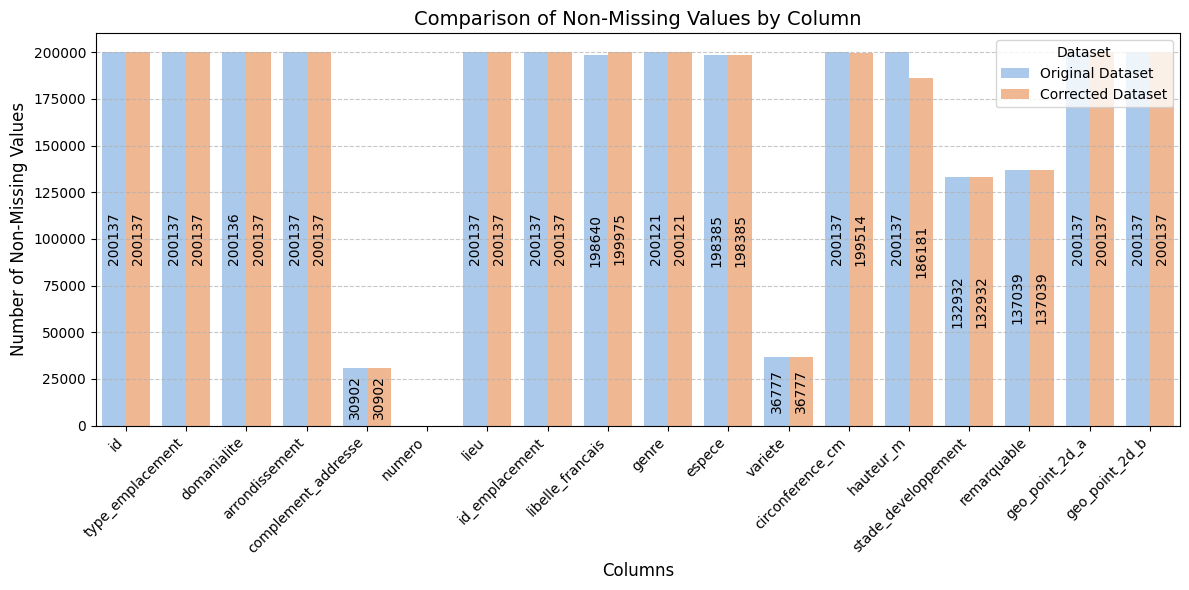

In [73]:
import seaborn as sns


# Calculate the number of non-missing values for each column
non_missing_original = df.notnull().sum()
non_missing_refined = df_refined.notnull().sum()

# Prepare data for the bar plot
comparison_data = pd.DataFrame({
    'Columns': non_missing_original.index,
    'Original Dataset': non_missing_original.values,
    'Corrected Dataset': non_missing_refined.values
}).melt(id_vars='Columns', var_name='Dataset', value_name='Non-Missing Count')


# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=comparison_data,
    x='Columns',
    y='Non-Missing Count',
    hue='Dataset',
    palette='pastel'
)
# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# Add count annotations to each bar (inside the bars)
for p in ax.patches:
    height = p.get_height()  # Bar height (value of the bar)
    if height > 0:  # Only annotate bars with positive height
        ax.annotate(
            f'{int(height)}',  # Display the count as an integer
            (p.get_x() + p.get_width() / 2., height / 2),  # Position inside the bar, vertically centered
            ha='center', va='center', fontsize=10, color='black', rotation=90
        )

# Add plot titles and labels
plt.title('Comparison of Non-Missing Values by Column', fontsize=14)
plt.ylabel('Number of Non-Missing Values', fontsize=12)
plt.xlabel('Columns', fontsize=12)
plt.legend(title='Dataset', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

<ipython-input-74-1a4a04441649>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


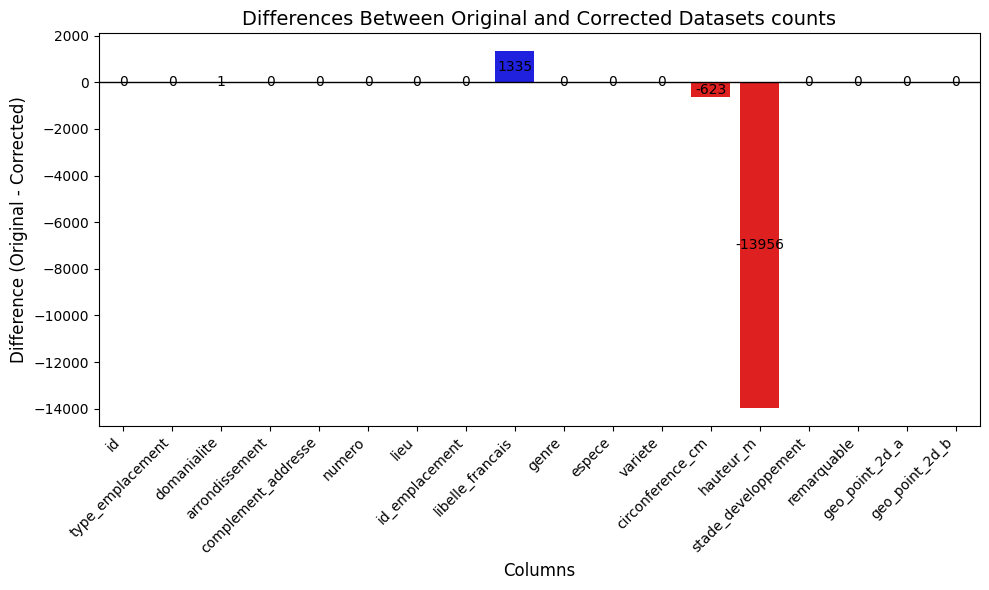

In [74]:
# Create a DataFrame for plotting
diff_df = data_diff = (non_missing_refined - non_missing_original).reset_index()
diff_df.columns = ['Columns', 'Difference']

# Plot the data using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=diff_df,
    x=diff_df.columns[0],
    y=diff_df.columns[1],
    palette=["blue" if x > 0 else "red" for x in diff_df['Difference']]  # Blue for positive, Red for negative
)

# Set the y-axis to be centered at 0
ax.axhline(0, color='black',linewidth=1)

# Add plot titles and labels
plt.title('Differences Between Original and Corrected Datasets counts', fontsize=14)
plt.ylabel('Difference (Original - Corrected)', fontsize=12)
plt.xlabel('Columns', fontsize=12)

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# Display the values inside the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # Position at the center of the bar
        height/2,  # Position at the top of the bar
        f'{int(height)}',  # Annotate with the number
        ha='center', va='center', fontsize=10, color='k', rotation=0
    )

# Show the plot
plt.tight_layout()  # Adjust the layout to avoid overlap
plt.show()

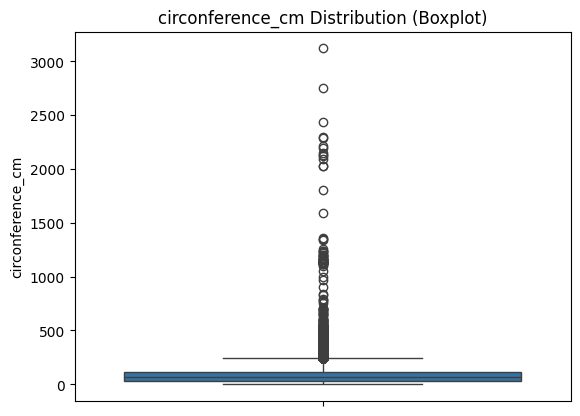

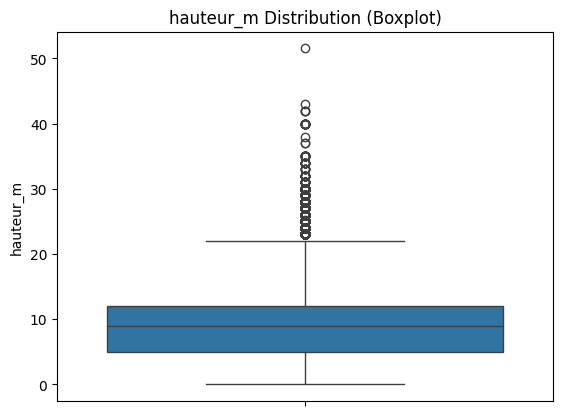

In [75]:
# boxplots
for variable in quantitative_variables:
    plot_univariate_variable_analysis(df_refined, variable, 'boxplot')

## 4) Analysis

### Naive analysis (after data clean)

In [76]:
df_refined.info() # display count of columns, lines and columns names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200137 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     199975 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     199514 non-null  float64
 13  hauteur_m            186181 non-null  float64
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

In [77]:
df_refined.describe()# general statistics only on number types variables (int and floats)

# problems:
## 0 as min value for circumference, height
## > 250000 cm as circumference, > 800000 m as height

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,200137.00,0.00,199514.00,186181.00,137039.00,200137.00,200137.00
mean,387202.68,NaN,80.26,8.93,0.00,48.85,2.35
std,545603.24,NaN,67.48,5.97,0.04,0.03,0.05
min,99874.00,NaN,0.00,0.00,0.00,48.74,2.21
25%,155927.00,NaN,30.00,5.00,0.00,48.84,2.31
50%,221078.00,NaN,70.00,9.00,0.00,48.85,2.35
75%,274102.00,NaN,115.00,12.00,0.00,48.88,2.39
max,2024745.00,NaN,3120.00,51.55,1.00,48.91,2.47


In [78]:
print(f"Number of different species: {df_refined['espece'].nunique()}")

Number of different species: 539


In [79]:
print(f"Number of remarquable different species: {df_refined[df_refined['remarquable']==1]['espece'].nunique()}")

Number of remarquable different species: 66


### Univariate Analysis

In [80]:
interesting_variables = {'domanialite':'pie','arrondissement':'heat_map',
                        'lieu':'heat_map', 'libelle_francais':'bars',
                        'genre':'bars', 'espece':'bars',
                        'variete':'bars','circonference_cm':'hist',
                        'hauteur_m':'hist','stade_developpement':'pie',
                         'remarquable':'bars_log'}

In [81]:
for variable in interesting_variables:
    plot_univariate_variable_analysis(df_refined, variable, interesting_variables[variable])
    print()

Output hidden; open in https://colab.research.google.com to view.

In [82]:
# remains to do
## multivariate analysis (not yet)

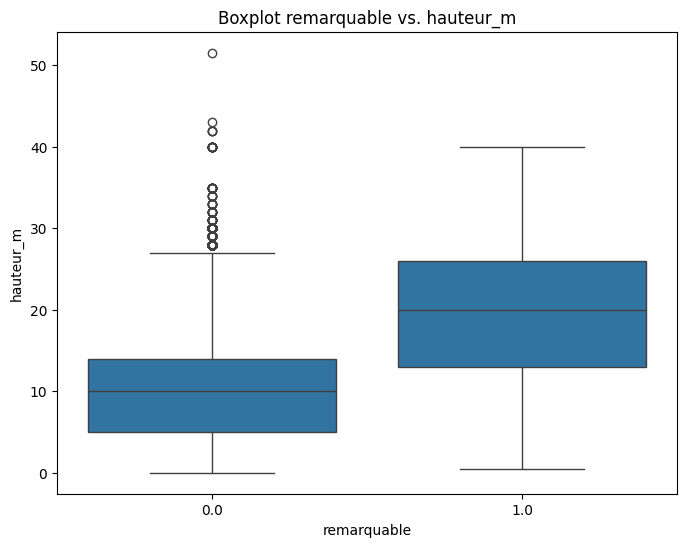

In [83]:
plot_bivariate_variable_analysis(df_refined, 'remarquable', 'hauteur_m', 'boxplot')

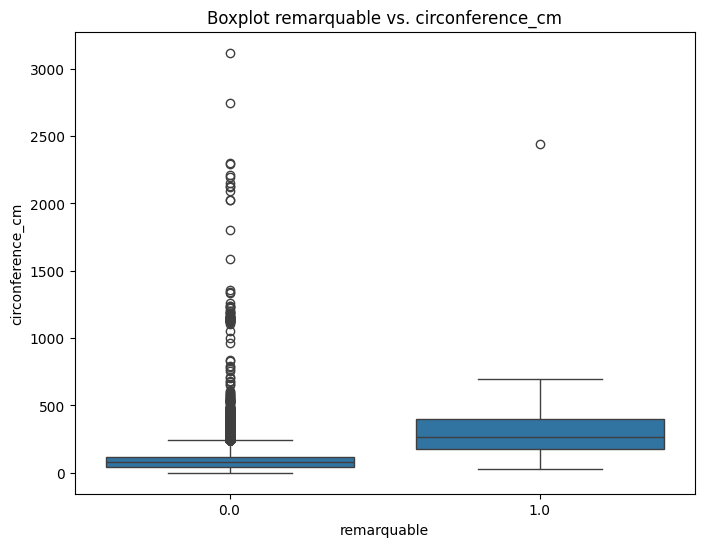

In [84]:
plot_bivariate_variable_analysis(df_refined, 'remarquable', 'circonference_cm', 'boxplot')

In [87]:
variable1_name = 'remarquable'
variable2_name = 'hauteur_m'
pearsonr, p_value = compute_bivariate_stats_indicators(df_refined, variable1_name, variable2_name)
print(f"Pearson correlation coefficient between {variable1_name} and {variable2_name} : {pearsonr}") # existing correlation but very weak

print()

variable1_name = 'remarquable'
variable2_name = 'circonference_cm'
pearsonr, p_value = compute_bivariate_stats_indicators(df_refined, variable1_name, variable2_name)
print(f"Pearson correlation coefficient between {variable1_name} and {variable2_name} : {pearsonr}") # existing correlation but very weak

Both quantitative variables : Pearson correlation analysis
Pearson correlation coefficient between remarquable and hauteur_m : 0.06269852992286187

Both quantitative variables : Pearson correlation analysis
Pearson correlation coefficient between remarquable and circonference_cm : 0.11668322959396166


In [88]:
eta_squared, anova_table = compute_bivariate_stats_indicators(df_refined, 'remarquable','espece')
print(f"Eta-squared: {eta_squared}")

Both quantitative and categorical variables : ANOVA analysis
Eta-squared: 0.05512247910689265


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 538, but rank is 481
  warnings.warn('covariance of constraints does not have full '
/content/drive/MyDrive/Colab_Notebooks/Project_2/data_analysis_functions.py:295: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_table['sum_sq'][0] / sum(anova_table['sum_sq'])
